# 4.9.2 Exercise

## Part II.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#importing dataset
path = r'C:\Users\Kid\01.2024 Instacart Basket Analysis Project'
df_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
#checking output
df_merged.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2398795       1             2                   3                  7   
2    473747       1             3                   3                 12   
3   2254736       1             4                   4                  7   
4    431534       1             5                   4                 15   

   days_since_prior_order  first_order  product_id  add_to_cart_order  \
0                     NaN         True         196                  1   
1                    15.0        False         196                  1   
2                    21.0        False         196                  1   
3                    29.0        False         196                  1   
4                    28.0        False         196                  1   

   reordered  ...        regularity_flag  first_name  last_name  gender  \
0          0  ...  Non-frequent customer       Linda     Nguyen  Female   
1          1  ...  Non-frequent customer       Linda     Nguyen  Female   
2          1  ...  Non-frequent customer       Linda     Nguyen  Female   
3          1  ...  Non-frequent customer       Linda     Nguyen  Female   
4          1  ...  Non-frequent customer       Linda     Nguyen  Female   

     state age n_dependants fam_status  income _merge  
0  Alabama  31            3    married   40423   both  
1  Alabama  31            3    married   40423   both  
2  Alabama  31            3    married   40423   both  
3  Alabama  31            3    married   40423   both  
4  Alabama  31            3    married   40423   both  

[5 rows x 33 columns]

In [4]:
#dropping indicator column
df_merged = df_merged.drop(columns=['_merge'])

#### 1. Distribution of orders by time of the day

In [5]:
#creating histogram
hist = df_merged['order_hour_of_day'].plot.hist(bins = 20)

In [ ]:
#exporting visualization
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'order_hour_of_day_histogram.png'))

##### The data shows that most orders occur between 7am and 4pm, followed by a slow decline between 5pm and 12. The least number of orders always occur past midnight.

#### 2. Distribution of orders in terms of loyalty

In [6]:
#checking values frequency
df_merged['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [7]:
#creating bar chart
bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'gray', 'gray'])

In [ ]:
#exporting visualization
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_flag_barchart.png'))

#### 3. Expenditure by time of the day

#### 3.1 Data sampling

In [8]:
#generating a seed
np.random.seed(4)

In [9]:
#preparing a True..False split list of 70%
dev = np.random.rand(len(df_merged)) <= 0.7

In [10]:
#creating a 70/30 split
big = df_merged[dev]
small = df_merged[~dev]

In [11]:
#checking result
len(df_merged) == len(big) + len(small)

True

In [12]:
#reducing number of columns
df_sample = small[['order_hour_of_day', 'prices']]

In [13]:
#checking result
df_sample.head()

order_hour_of_day  prices
0                   8     9.0
2                  12     9.0
3                   7     9.0
6                   9     9.0
10                  8    12.5

#### 3.2 Creating line chart

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


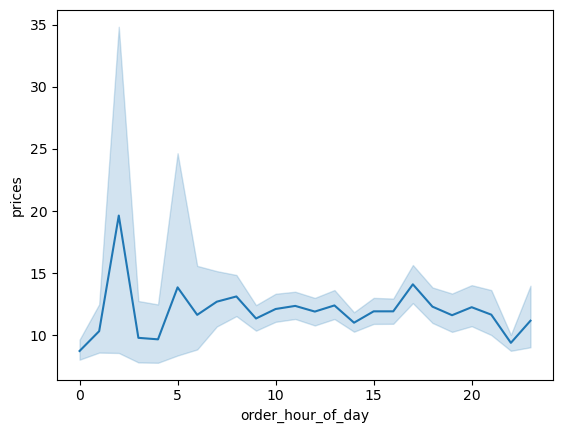

In [23]:
line_ords = sns.lineplot(x = 'order_hour_of_day', y = 'prices', data = df_sample)

In [15]:
#exporting visualization
line_ords.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_hour_of_day_line.png'))

#### 4. Age vs Number of dependants

In [21]:
line_deps = sns.lineplot(x = 'age', y = 'n_dependants', data = small)

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


##### The data shows no pattern, neither a direct relationship between age and number of dependants.

In [22]:
#exporting visualization
line_deps.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_number_dependants_line.png'))

#### 5. Age vs Income

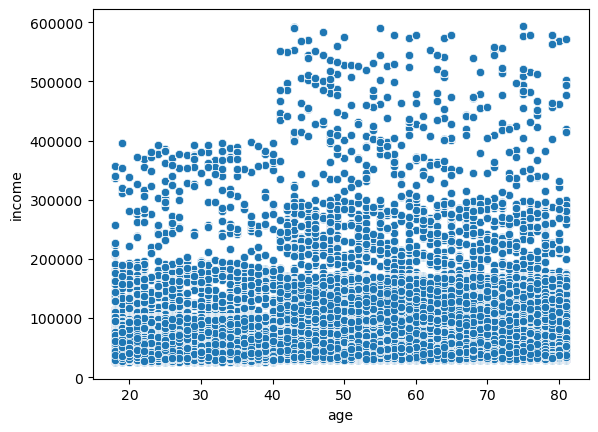

In [24]:
#creating scatter plot
scatter_inc = sns.scatterplot(x = 'age', y = 'income', data = small)

##### The data shows no clear trend between age and income. 

In [25]:
#exporting visualization
scatter_inc.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_income_scatter.png'))